# Start Here

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole.

In [7]:
%load_ext autoreload
%autoreload 2

import matplotlib.pylab as plt

import tidy3d as td
import tidy3d.web as web
from tidy3d.constants import HBAR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# Waveguide height and width, micron
wg_height = 0.8
wg_width = 1.1

# set up parameters of simulation
dl=0.05
pml = td.PML(num_layers=10)
sim_length = 4
pml_spacing = 1
sim_size = [
    sim_length,
    wg_width + 2*pml_spacing,
    wg_height + 2*pml_spacing]

lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 10.0
run_time = 10e-11

# create structure
pole = [(13.587564477728654j, -7.6129270108833165j),(0.14383907244557104j, -0.03031755979289471j)]
mat_clad = td.PoleResidue(poles=[(a / HBAR, c / HBAR)for (a, c) in pole])
mat_wvg = td.Medium(permittivity=4)

cladding = td.Structure(
    geometry = td.Box(center=[0,0,0],size=[td.inf,td.inf,td.inf]),
    medium=mat_clad)

wvg = td.Structure(
    geometry=td.Box(center=[0, 0, 0], size=[td.inf, 1.5, 1.5]),
    medium=mat_wvg)

# create source
source = td.VolumeSource(
    center=(-1, 0, 0),
    size=(0.1, 0.1, 0.1),
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=fwidth),
    polarization='Ey')

# create monitor
monitor = td.FieldMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=(0, 0, 0),
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name='field')

# Initialize simulation
sim = td.Simulation(size=sim_size,
                    grid_size=(dl, dl, dl),
                    structures=[cladding,wvg],
                    sources=[source],
                    monitors=[monitor],
                    run_time=run_time,
                    pml_layers=(pml, pml, pml),
                   shutoff=0)

In [18]:
data = web.run(sim, task_name='divergence', path='data/data.hdf5')

Downloading... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━  83% 0:00:01

[16:44:46] INFO     loading SimulationData from data/data.hdf5                  ]8;id=656244;file:///home/weiliang/Documents/Tidy3D-client-revamp/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=776125;file:///home/weiliang/Documents/Tidy3D-client-revamp/tidy3d/web/webapi.py#300\300]8;;\

           WARNING  Simulation run has diverged!                                 ]8;id=60069;file:///home/weiliang/Documents/Tidy3D-client-revamp/tidy3d/components/data.py\data.py]8;;\:]8;id=123274;file:///home/weiliang/Documents/Tidy3D-client-revamp/tidy3d/components/data.py#1059\1059]8;;\

In [19]:
print(data.log)

Simulation domain Nx, Ny, Nz: [100, 82, 75]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 6.1500e+05.
Using subpixel averaging: True
Number of time steps: 1.1539e+06
Automatic shutoff factor: 0.00e+00
Time step (s): 8.6662e-17
Compute source modes time (s):     0.1717
Compute monitor modes time (s):    0.1771

Rest of setup time (s):            0.1720

Starting solver...
- Time step    306 / time 2.65e-14s (  0 % done), field decay: 1.00e+00
- Time step  46156 / time 4.00e-12s (  4 % done), field decay: 3.12e-07
- Time step  92312 / time 8.00e-12s (  8 % done), field decay: 1.00e+00
- Time step 138468 / time 1.20e-11s ( 12 % done), field decay: 1.00e+00
- Time step 184624 / time 1.60e-11s ( 16 % done), field decay: 1.00e+00
Field divergence, exiting solver. 

Solver time (s):                   484.3260

The simulation run has diverged! Possible solutions include increasing the PML thickness, decreasing the courant stability factor, or including materials with permi

<AxesSubplot:title={'center':'f = 2.998e+14 [Hz], z = 0 [um]'}, xlabel='x position [um]', ylabel='y position [um]'>

<Figure size 432x288 with 2 Axes>

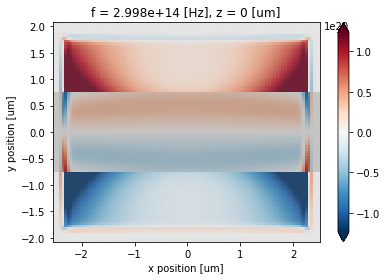

In [20]:
data.plot_field('field', 'Ey', freq=freq0, z=0)